#### "All code that I am submitting is written entirely by me. It may contain some portions of code shown by the instructor in class while solving RL problems. Aside from this, I have not used code written by others or shown/shared my code with anyone."

Import dependencies

In [1]:
import sys
import gym
import numpy as np
from collections import defaultdict
# from plot_utils import plot_blackjack_values, plot_policy # determine if i need to rewrite these

Render

In [ ]:
env.reset()
env.render()

In [23]:
env.close()

: 

observations and action space (squares and directions we can move)

In [ ]:
print('observation space:',env.observation_space)
print('action space:',env.action_space)

## 1st Visit Constant Alpha GLIE MC Control Algorithm Implimentation

In [2]:
def generate_episode_from_Q(env, Q, epsilon):
    """ generates an episode from following the epsilon-greedy policy """
    episode = []
    state = env.reset()[0]
    while True:
        action = np.random.choice(np.arange(4), p=get_probs(Q[state], epsilon)) \
                                    if state in Q else env.action_space.sample() # 2nd option is random --- changed to be arrange (4) from 2
        # print("yas") if state in Q else print("no") # see if we are remembering states DEBUG
        next_state, reward, done, info, unknown = env.step(action) # perform step (move)
        # if reward == 1:
        #     print("goal!!!!!!!!!""\n") 
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode

def get_probs(Q_s, epsilon):
    """ obtains the action probabilities corresponding to epsilon-greedy policy """
    policy_s = np.ones(4) * epsilon / 4 # 4 is num of actions
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon / 4) # policy_s is a dictionary indexed by best_a -- changed from 2 to 4
    return policy_s

# incremental mean with constant alpha
def update_Q(env, episode, Q, alpha):
    """ updates the action-value function estimate using the most recent episode """
    states, actions, rewards = zip(*episode)
    for i, state in enumerate(states):
        old_Q = Q[state][actions[i]]
        Q[state][actions[i]] = old_Q + alpha*(sum(rewards[i:]) - old_Q)
    return Q

def mc_control(env, num_episodes, alpha, eps_start=1.0, eps_decay=.9999, eps_min=0.12): #(env, num_episodes, alpha, eps_start=1.0, eps_decay=.99999, eps_min=0.05)
    nA =4 # changed from 2 to 4
    # initialize empty dictionary of arrays
    Q = defaultdict(lambda: np.zeros(nA))
    epsilon = eps_start # e.g. 1
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 10000 == 0: #changed from 1000 to 10 
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        # set the value of epsilon
        epsilon = max(epsilon*eps_decay, eps_min)
        # generate an episode by following epsilon-greedy policy
        episode = generate_episode_from_Q(env, Q, epsilon)
        # update the action-value function estimate using the episode
        Q = update_Q(env, episode, Q, alpha)
    # determine the policy corresponding to the final action-value function estimate
    policy = dict((k,np.argmax(v)) for k, v in Q.items()) # k, np.argmax(v) are state action pairs
    print(epsilon)
    return policy, Q

Run episodes and obtain policy 

1.) 4x4

In [15]:
# obtain the estimated optimal policy and action-value function
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True) #remeber to make slippery , render_mode='human'
# env.reset
policy, Q = mc_control(env, 2000, 0.01) 

/home/caleb/Documents/course_work/ASE 389/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


0.8187225652655491


2.)8x8

In [3]:
# obtain the estimated optimal policy and action-value function
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=False) #remeber to make slippery , render_mode='human'
# env.reset
policy, Q = mc_control(env, 20000, 0.01) #change from 150000 and .02

/home/caleb/Documents/course_work/ASE 389/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 20000/20000.0.13532174948275888


In [22]:
#for debug
for key, value in sorted(Q.items()):
    print(f'{key}: {value}')
    

# print("yas") if state in Q else print("no")

0: [0.10257672 0.03805316 0.04518491 0.03967496]
1: [0.02420631 0.04441978 0.06208624 0.05129739]
2: [0.057062   0.06625428 0.07282758 0.03598587]
3: [0.07382697 0.04145076 0.07339053 0.05025493]
4: [0.03318144 0.04320577 0.06344034 0.06486995]
5: [0.02766405 0.04569194 0.06579518 0.04203398]
6: [0.03280307 0.05695636 0.07146872 0.03551507]
7: [0.06086151 0.06690851 0.08626893 0.09239881]
8: [0.06309411 0.04538449 0.03882126 0.05225485]
9: [0.06141622 0.01979172 0.02470077 0.03707368]
10: [0.02735075 0.01969465 0.03008708 0.07181128]
11: [0.02524703 0.         0.03059206 0.06788934]
12: [0.0244594  0.00852437 0.03752943 0.03110466]
13: [0.01347329 0.02263995 0.04432686 0.0433301 ]
14: [0.02493719 0.05447046 0.0420969  0.02685475]
15: [0.04013737 0.08636102 0.04169933 0.04183976]
16: [0.02109121 0.02912932 0.0149384  0.03677967]
17: [0.01311464 0.01710706 0.04354458 0.03668386]
18: [0.03502008 0.009801   0.         0.03661221]
20: [0.         0.00913517 0.0213121  0.00932065]
21: [0.019

test policy

4x4:

In [16]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True, render_mode='human') #remeber to make slippery 

8x8:

In [4]:
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8", is_slippery=False, render_mode='human') #remeber to make slippery 

In [5]:

episode = []
state = env.reset()[0]
epsilon=.01
while True:
    action = np.random.choice(np.arange(4), p=get_probs(Q[state], epsilon)) \
                                if state in Q else env.action_space.sample() # 2nd option is random --- changed to be arrange (4) from 2
    # print("yas") if state in Q else print("no") # see if we are remembering states DEBUG
    next_state, reward, done, info, unknown = env.step(action) # perform step (move)
    episode.append((state, action, reward))
    state = next_state
    if done:
        break


## Plot the optimal policy as a world grid with optimal actions on each cell

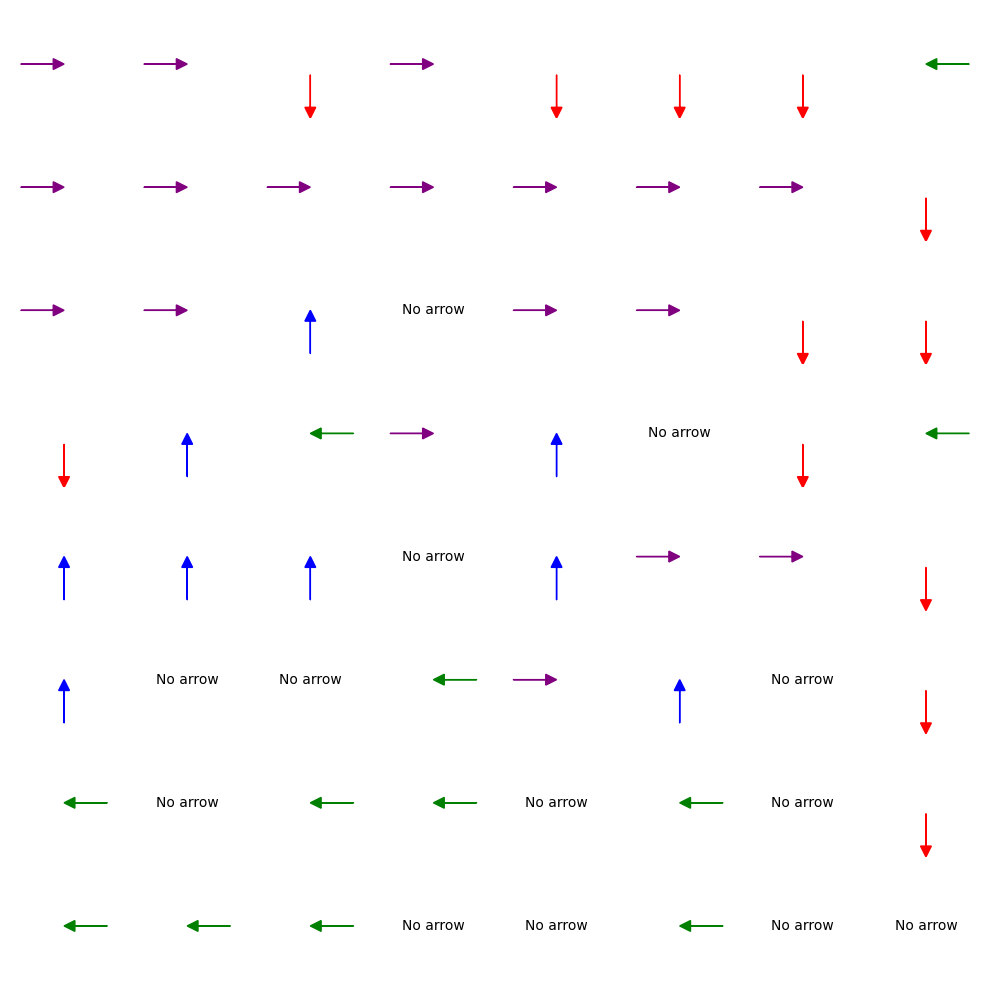

: 

In [6]:
import matplotlib.pyplot as plt

width_of_grid=8 #change based on 4x4 or 8x8

# Create a nxn grid of subplots
fig, axes = plt.subplots(width_of_grid, width_of_grid, figsize=(10, 10))

# Define a function to draw arrows based on your conditions
def draw_arrow(ax, direction):
    if direction == 3 : #"up":
        ax.arrow(0.5, 0.1, 0, 0.3, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    elif direction == 1 : #"down":
        ax.arrow(0.5, 0.4, 0, -0.3, head_width=0.1, head_length=0.1, fc='red', ec='red')
    elif direction == 0 : #"left":
        ax.arrow(0.9, 0.5, -0.3, 0, head_width=0.1, head_length=0.1, fc='green', ec='green')
    elif direction == 2 : #"right":
        ax.arrow(0.1, 0.5, 0.3, 0, head_width=0.1, head_length=0.1, fc='purple', ec='purple')
    else:
        ax.text(0.5, 0.5, "No arrow", ha='center', va='center')

directions=np.ones(width_of_grid**2)*4
for key, value in sorted(Q.items()):
    list1=value.tolist()
    # print(list.index(max(value)))
    directions[key]=(list1.index(max(value)))
# print(directions)

# Loop through the grid and draw arrows based on directions
for i in range(width_of_grid):
    for j in range(width_of_grid):
        ax = axes[i, j]
        direction = directions[i * width_of_grid + j]
        draw_arrow(ax, direction)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')

plt.tight_layout()
plt.show()


## Color coded Q Table with states on the vertical axis and actions on the horizontal

+------+------------------------+------------------------+------------------------+------------------------+
|  0   |          left          |          down          |         right          |           up           |
+------+------------------------+------------------------+------------------------+------------------------+
| 0.0  |  0.009049318485825178  |  0.010005710017717667  |  0.07985434730108965   | 5.818022972978205e-06  |
| 1.0  |  0.027955488916612575  |  0.01008701907033896   |  0.00988297110430439   |  0.09498829922155246   |
| 2.0  |  0.020573748260475047  |  0.09019779294484973   |   0.0383793714245615   | 0.0008963973579350717  |
| 3.0  |  0.003880435233819755  |  0.003859869252815129  |  0.11722351445688263   |  0.004008213584964153  |
| 4.0  |  0.007431001498614747  |  0.10736238509052397   |  0.007694136165115659  |  0.007305561462877714  |
| 5.0  |  0.02561462462364303   |  0.018976673007748558  |  0.018980351333410847  |  0.10913791386588337   |
| 6.0  |   0.144844

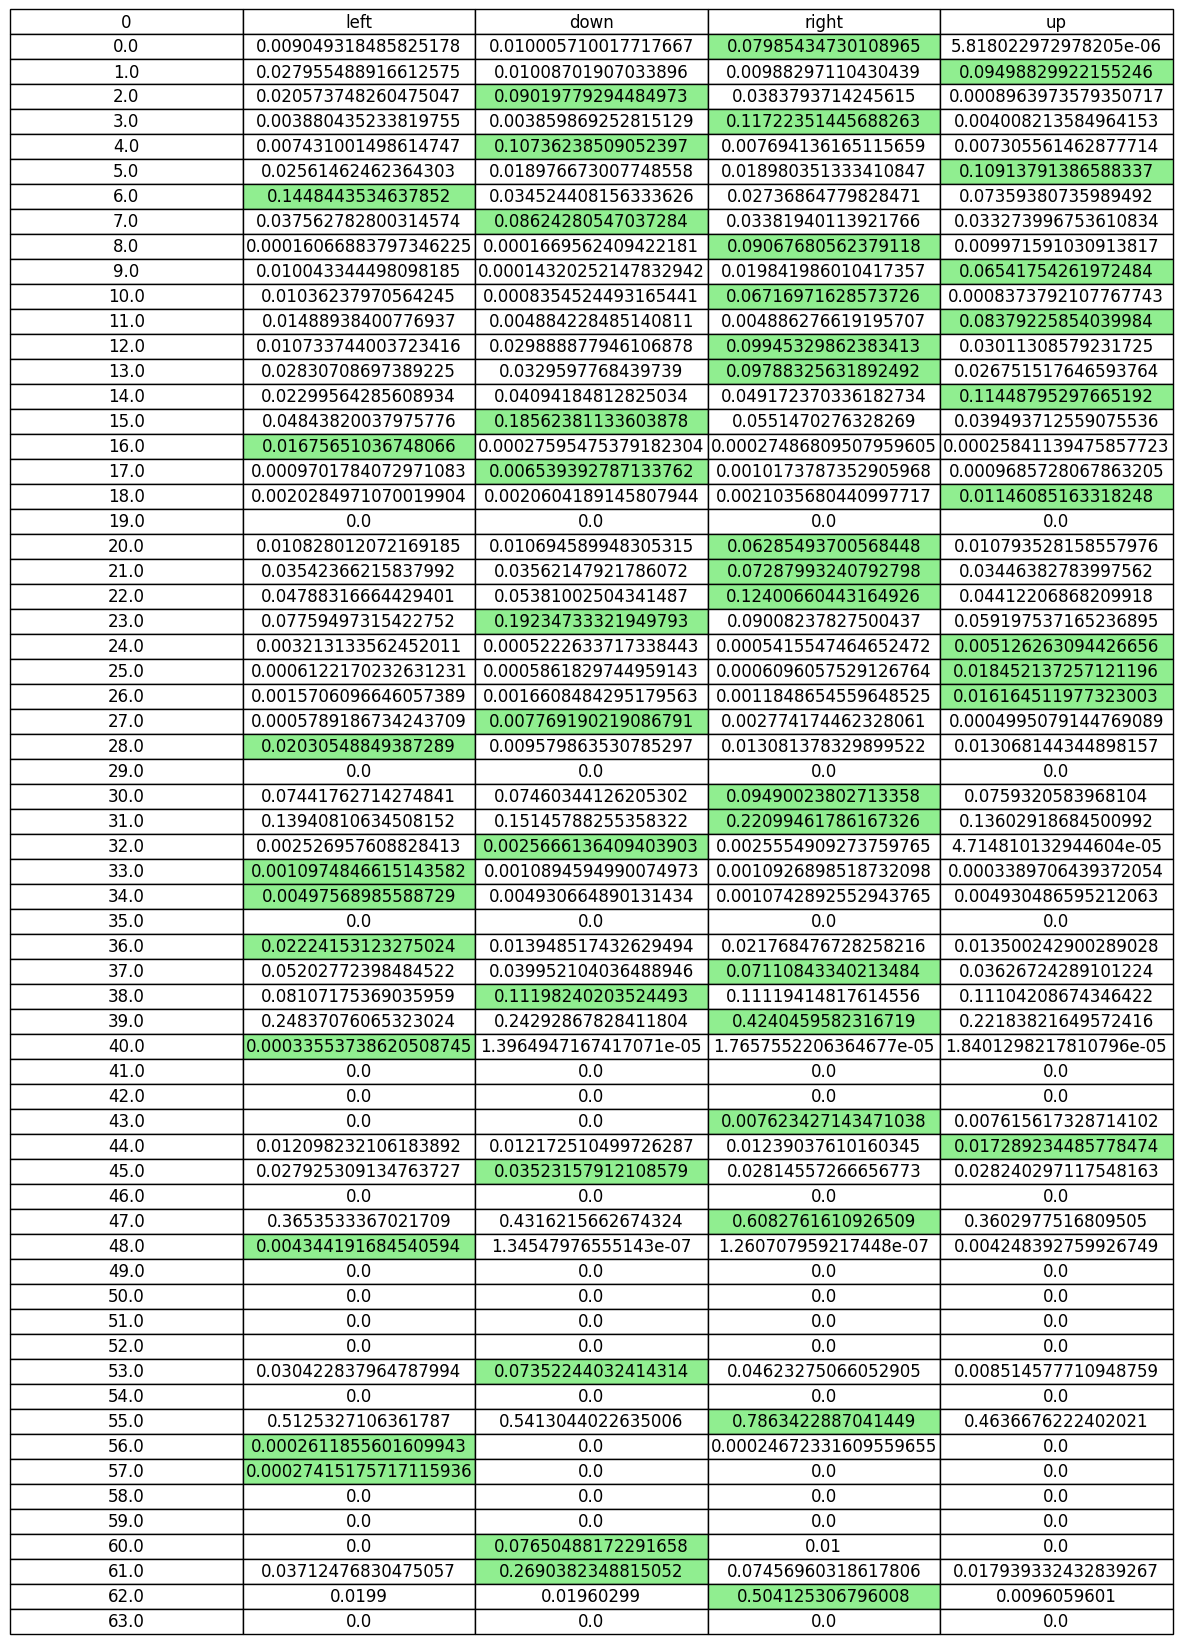

: 

In [14]:
import pandas as pd
from tabulate import tabulate

for num in range(width_of_grid**2):
    # if key in Q
    if num not in Q.keys():
        Q[num] = [0,0,0,0]
        # value = [0,0,0,0] #np.random.choice(np.arange(4), p=get_probs(Q[state], epsilon)) 
        # print('test')
                                    
# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(sorted(Q.items()))

# Split the Q value column into separate columns
df['left'] = df[1].apply(lambda x: x[0] if len(x) > 0 else None)
df['down'] = df[1].apply(lambda x: x[1] if len(x) > 1 else None)
df['right'] = df[1].apply(lambda x: x[2] if len(x) > 2 else None)
df['up'] = df[1].apply(lambda x: x[3] if len(x) > 3 else None)


# Drop the original 'Hobbies' column
df.drop(1, axis=1, inplace=True)

# print(df)    #uncomment
# Export the DataFrame to a excel file
# df.to_excel('4by4table.xlsx', index=False)

# Convert the DataFrame to a table figure
table_figure = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

# Print the table figure
print(table_figure) # uncomment

# Create a table-like figure using matplotlib
fig, ax = plt.subplots(figsize=(15, 6))
ax.axis('tight')
ax.axis('off')

# Define cell colors
cell_colors = [['white'] * len(df.columns) for _ in range(len(df) + 1)]  # Initialize with white

# Filter rows that have all zeros
df_filtered = df.loc[(df.iloc[:, 1:] != 0).any(axis=1)]
# print(df_filtered)

# Find the column with the maximum value in each row
max_columns = df_filtered.iloc[:, 1:].idxmax(axis=1)
max_rows = df_filtered.index

# for i in max_rows:
#     print(i)
# print(max_columns)
# Highlight the maximum value in each row
j=0
for i in max_rows:#range(len(max_columns)):
    max_index = df_filtered.columns.get_loc(max_columns.iloc[j])
    cell_colors[i+1][max_index] = 'lightgreen'  # Highlight with a light green color
    j+=1


table_data = [df.columns.tolist()]  # Include the column names as the first row
for i in range(len(df)):
    table_data.append(df.iloc[i].tolist())

# ax.table(cellText=table_data, cellLoc='center', loc='center')
# Create the table with cell colors
table = ax.table(cellText=table_data, cellColours=cell_colors, cellLoc='center', loc='center')

# Set the table font size
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the cell height by changing the scale (e.g., 1.5 for 1.5 times the height)

plt.show()
